In [1]:
#https://www.kaggle.com/damienbeneschi/mnist-eda-preprocessing-classifiers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# reading the data
test = pd.read_csv('/home/kilian/Desktop/Projects/test.csv')
train = pd.read_csv('/home/kilian/Desktop/Projects/train.csv')
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


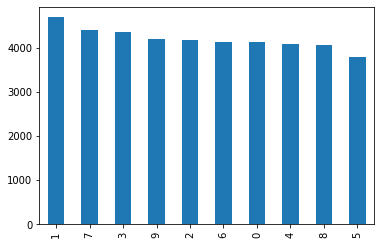

In [3]:
# splitting trainingset into labels and images
train_y = train['label']
train_x = train.iloc[:,1:]

# analyse pixel intensity
train_x.describe()

# visualize the distribution of the digits
train_y.value_counts().plot(kind='bar')
plt.show()

The labels/digits are:  [6 1 8 0 5 3 8 1 0 7 5 6 0 6 9 3 3 1 1 8]


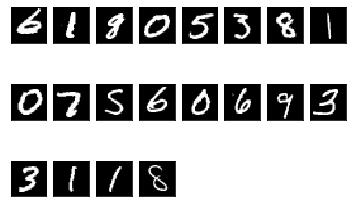

In [4]:
def display_digit(N,train):
    """selects N randomn images out of the training set and displays the images with 8 images/row"""
    # choose randomly N numbers out of 42000 and put them into a list
    choose_N = np.random.randint(low=0,high=42000,size=N).tolist()
    
    # take a subset of N images
    subset_images = train.iloc[choose_N,:]
    
    # reindex this subset of images
    subset_images.index = range(1,N+1)
    
    # print out the labels of the N images
    print("The labels/digits are: " , subset_images.label.values)
    
    # drop the lagel column out of the images-subset
    subset_images_x = subset_images.drop(columns='label')
    
    # iterate over the rows of the subset
    for i, row in subset_images_x.iterrows():
        # add subplot
        plt.subplot((N//8)+1,8,i)
        # reshape the images
        pixels = row.values.reshape((28,28))
        # display data as an image
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
        
    #plt.title("randomly picked images from the dataset")
    plt.show()

    return 
        
    
display_digit(20,train)    

In [5]:
def remove_constant_pixels(train_x):
    """removes pixels from the image with constant intensity values, hence which are always 0 (black) or 255 (white)
       returns the cleared dataset and the list of removed pixels(columns)"""
    changed_train_x = train_x.loc[:]
    
    dropped_pixels_0 = []
    for col in train_x:
        if changed_train_x[col].max() == 0:
            changed_train_x.drop(columns=[col] , inplace=True)
            dropped_pixels_0.append(col)
    
    dropped_pixels_255 = []
    for col in changed_train_x:
        if changed_train_x[col].min() == 255:
            changed_train_x.drop(columns=[col] , inplace=True)
            dropped_pixels_255.append(col)
            
    return changed_train_x, dropped_pixels_0 + dropped_pixels_255

changed_train_x, dropped_pixels = remove_constant_pixels(train_x)
print(changed_train_x, "\n", dropped_pixels)

       pixel12  pixel13  pixel14  pixel15  pixel32  pixel33  pixel34  pixel35  \
0            0        0        0        0        0        0        0        0   
1            0        0        0        0        0        0        0        0   
2            0        0        0        0        0        0        0        0   
3            0        0        0        0        0        0        0        0   
4            0        0        0        0        0        0        0        0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
41995        0        0        0        0        0        0        0        0   
41996        0        0        0        0        0        0        0        0   
41997        0        0        0        0        0        0        0        0   
41998        0        0        0        0        0        0        0        0   
41999        0        0        0        0        0        0        0        0   

       pixel36  pixel37  ..

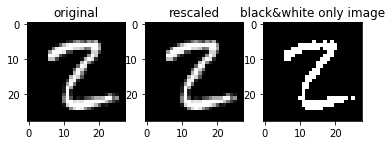

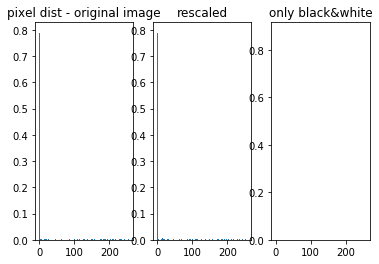

In [35]:
# pictures rescaling --> changing pixel values to either 0 or 255

# pick a random index --> corresponding pixelvalues --> image
index_random_picture = np.random.randint(low=0,high=42000, size=1).tolist()[0]
pixels = train_x.iloc[index_random_picture,:]
image = pixels.values.reshape((28,28))

# rescaling the intensity --> image and pixels
pmin, pmax = image.min(), image.max()
rescaled_image =255*(image-pmin) / (pmax - pmin)
rescaled_pixels = rescaled_image.flatten()

# alter image and pixels to only white and black
only_bw_pixels = pixels.apply(lambda x : 0 if x<128 else 255)
only_bw_image = only_bw_pixels.values.reshape((28,28))

# show images
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(rescaled_image, cmap='gray')
plt.title('rescaled')

plt.subplot(1,3,3)
plt.imshow(only_bw_image, cmap='gray')
plt.title('black&white only image')
plt.show()

# pixel intesity histogram
plt.subplot(1,3,1)
plt.hist(pixels, bins=256, range=(0,256), density=True)
plt.title('pixel dist - original image')

plt.subplot(1,3,2)
plt.hist(rescaled_pixels, bins=256, range=(0,256), density=True)
plt.title('rescaled')

plt.subplot(1,3,3)
plt.hist(only_bw_pixels, bins=256, range=(0,256), density=True)
plt.title("only black&white")
plt.show()


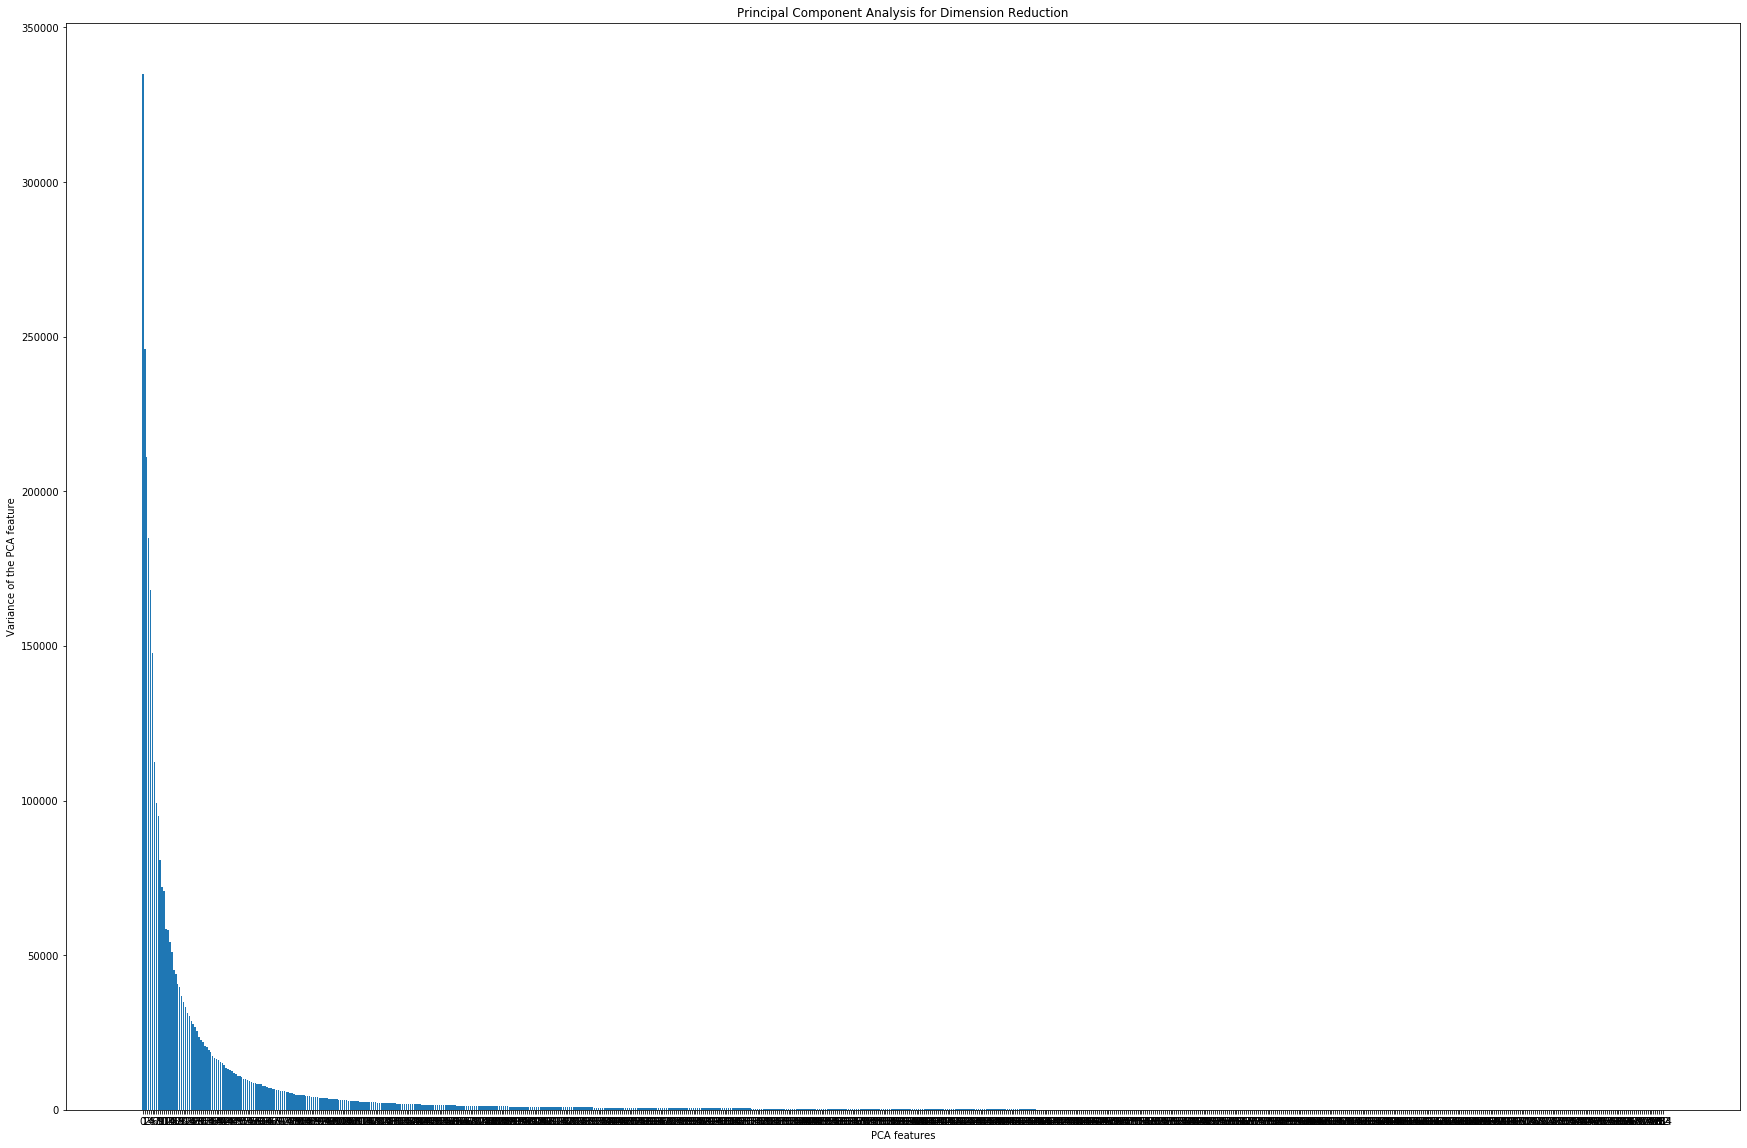

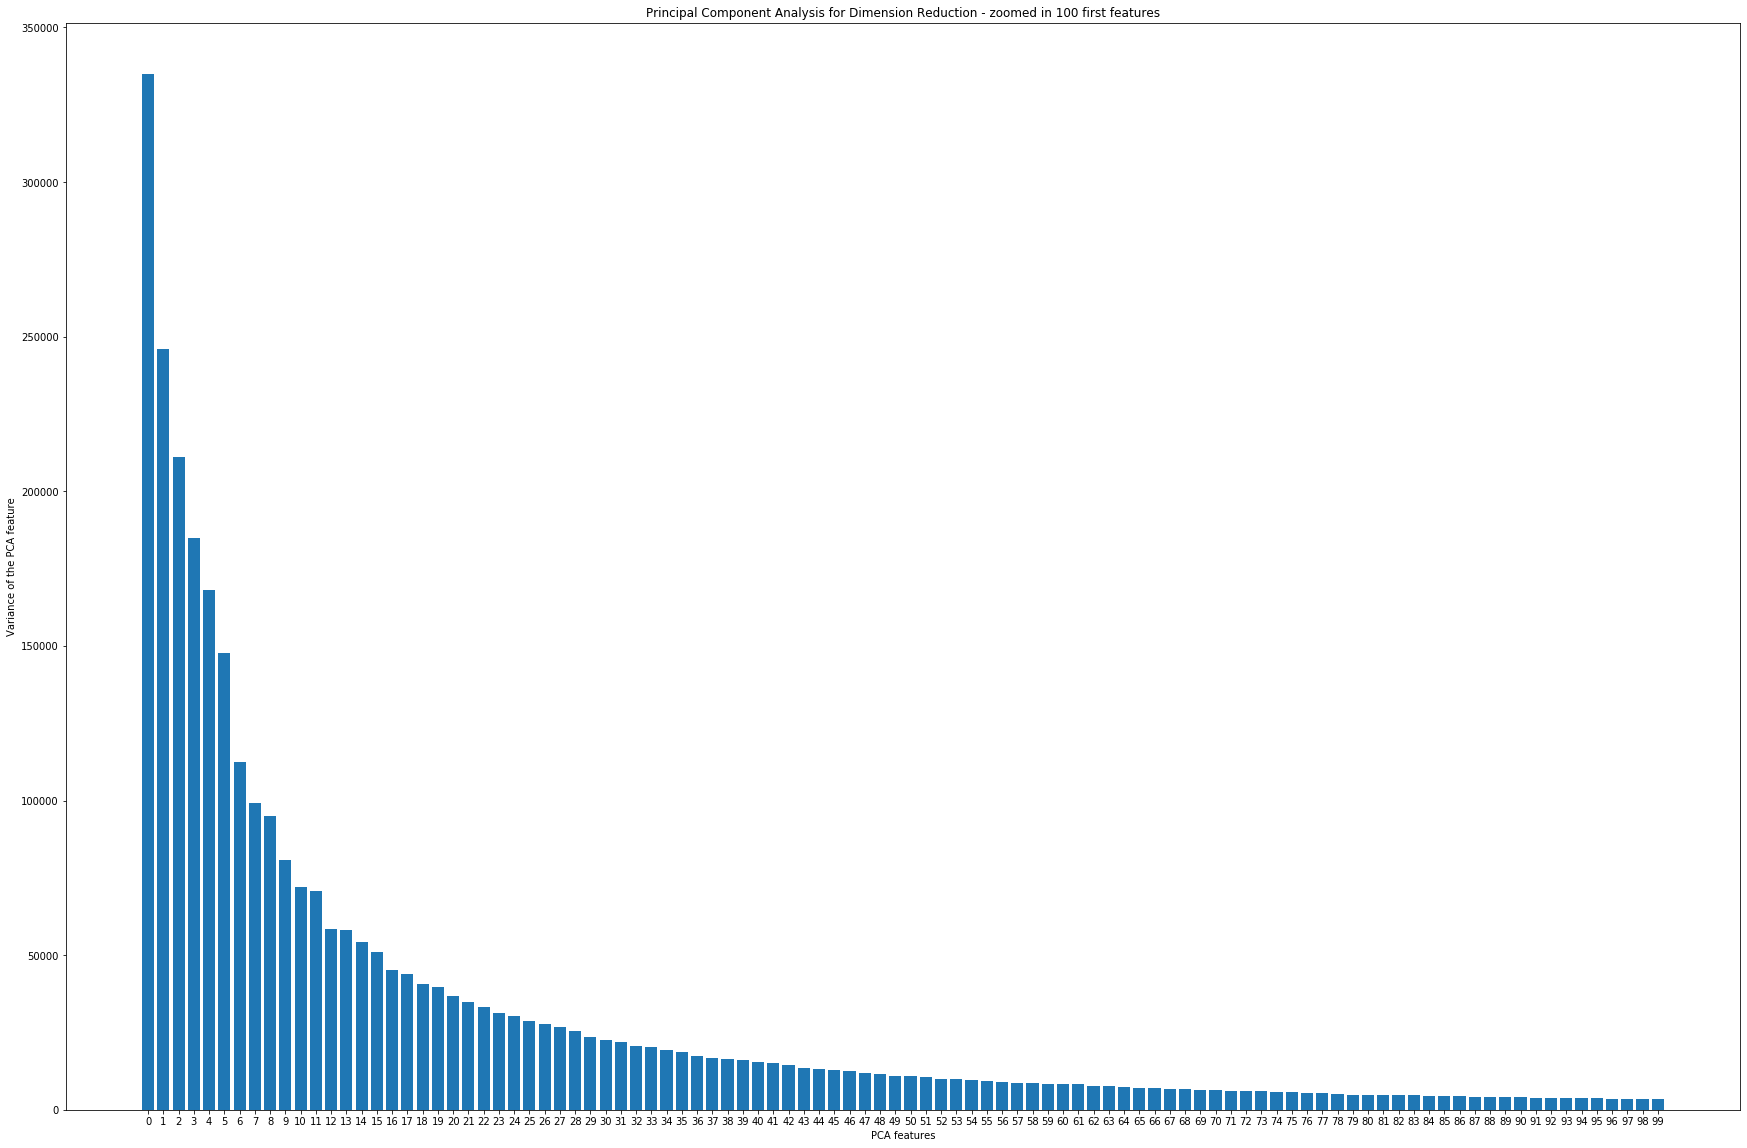

In [8]:
from sklearn.decomposition import PCA 
# Principal Components Analysis (PCA)
samples = train.values
digits=train.label.tolist()
pca = PCA()
pca.fit(samples)

#PCA feature variance visualization
pca_features =range(pca.n_components_)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(pca_features, pca.explained_variance_)
_ = plt.xticks(pca_features)
_ = plt.title('Principal Component Analysis for Dimension Reduction')
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
#_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

#PCA features variance visualization --> zoomed in 
# the first l features
l=100
x= range(l)
_ = plt.figure(figsize=(30,20))
_ = plt.bar(x, pca.explained_variance_[:l])
_ = plt.xticks(x)
_ = plt.title('Principal Component Analysis for Dimension Reduction - zoomed in {} first features'.format(l))
_ = plt.xlabel('PCA features')
_ = plt.ylabel('Variance of the PCA feature')
#_ = plt.savefig('visualizations/PCA features variance.png')
plt.show()

[0.0974892  0.16909228 0.23055118 0.28434413 0.33328689 0.37631894
 0.48916743 0.73182935 0.85329653 0.89079975 0.91462005 0.96619572
 0.99579253 1.        ]


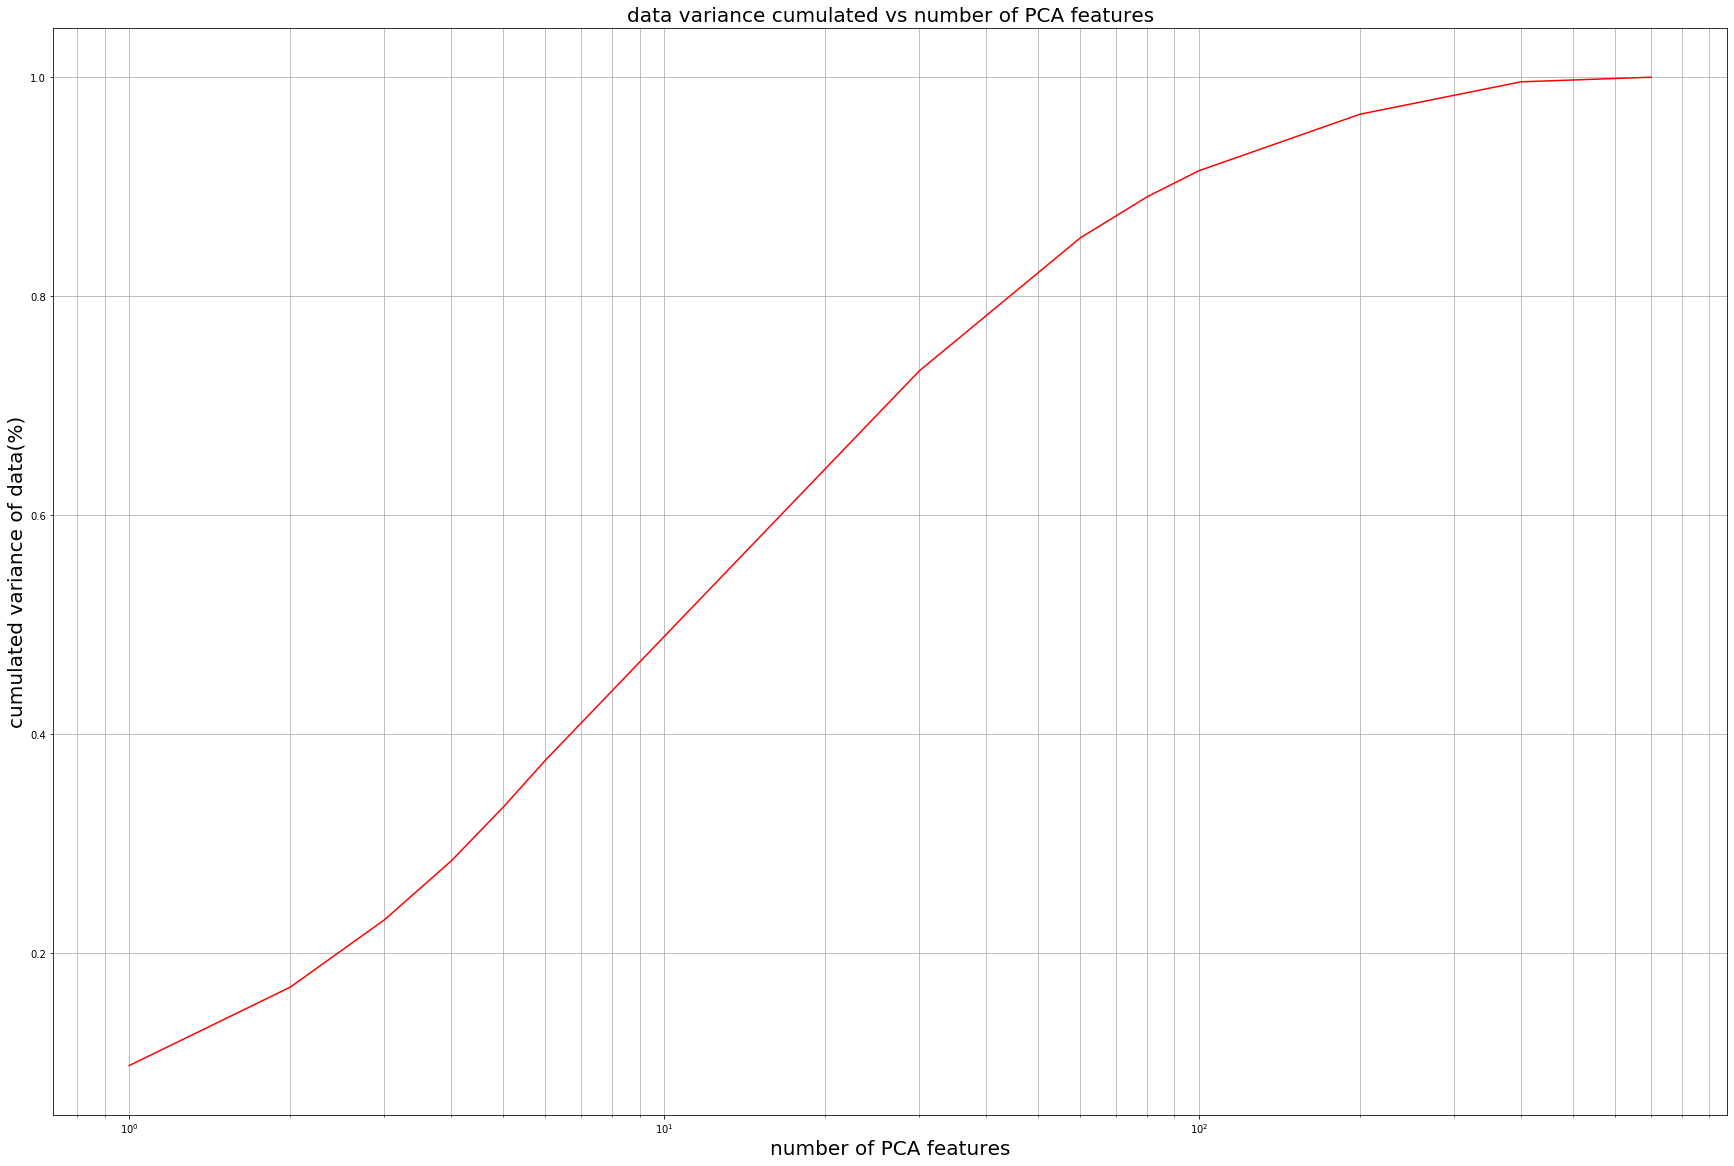

In [9]:
# visualization of the variance of the data carried by the number of PCA features
n_components = np.array([1,2,3,4,5,6,10,30,60,80,100,200,400,700])
cumul_variance = np.empty(len(n_components))
for i, n in enumerate(n_components):
    pca = PCA(n_components=n)
    pca.fit(samples)
    cumul_variance[i]= np.sum(pca.explained_variance_ratio_)

print(cumul_variance)

_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(n_components, cumul_variance, color='red')
_ = plt.xscale('log')
_ = plt.xlabel('number of PCA features', size=20)
_ = plt.ylabel('cumulated variance of data(%)' , size = 20)
_ = plt.title('data variance cumulated vs number of PCA features' , size=20)
#plt.savefig('visualizations/cumulated variance_pca features.png')
plt.show()

shape of NMF features: (42000, 16), shape of NMF components: (16, 784)


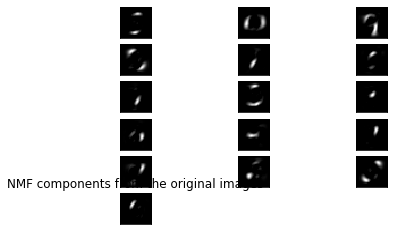

CPU times: user 1min 46s, sys: 603 ms, total: 1min 47s
Wall time: 20 s


In [10]:
%%time
from sklearn.decomposition import NMF
# Non-Negative Matrix Factorization (NMF)

s = np.random.randint(low=0, high=42001, size = 8200).tolist()
samples = train.drop(columns='label').values

nmf = NMF(n_components=16)
nmf_features = nmf.fit_transform(samples)
nmf_components = nmf.components_
print('shape of NMF features: {}, shape of NMF components: {}'.format(nmf_features.shape, nmf_components.shape))

#visualisation of the features
for i, component in enumerate(nmf_components):
    N = nmf_components.shape[0]
    ax = plt.subplot((N//3)+1, 3, i+1)
    bitmap = component.reshape((28,28))
    plt.imshow(bitmap, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.title('NMF components from the original images')
plt.show()

In [11]:
########################################


from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
#Sample randomly the dataset using discrete_uniform pick-up to reduce the amount of data
#sample = np.random.randint(low=0, high=42001, size=8400).tolist()
X = train.values  #.iloc[sample, :]
X = X / 255.0
y = train['label'].values  #.iloc[sample, :]
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Yielding the scores according to number of NMF components
components = np.arange(1, 100)
scores = np.empty(len(components))
for n in components:
    pipeline = make_pipeline(NMF(n_components=n), SVC(kernel='rbf', cache_size=1000))
    pipeline.fit(X_train, y_train)
    scores[n-1] = pipeline.score(X_test, y_test)

#Plotting of the scores evlution
_ = plt.figure(figsize=(30,20))
_ = plt.grid(which='both')
_ = plt.plot(components, scores)
_ = plt.xlabel('Number of NMF components', size=20)
_ = plt.ylabel('Score obtained', size=20)
_ = plt.title('Evolution of SVC classification score (samples={})'.format(len(y)), 
              size=30)
plt.savefig('visualizations/Score vs components NMF.png')
plt.show()

print("Best score {} obtained for {} components".format(scores.max(), scores.argmax()+1))

Shape of X and Y arrays: ((42000, 785), (42000,))


KeyboardInterrupt: 

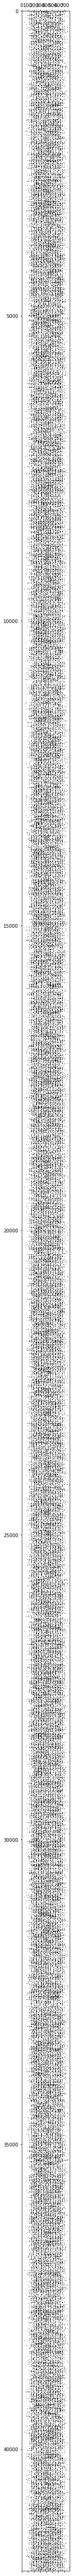

NameError: name 'csr_matrix' is not defined

In [12]:
##################################

#Sparsity visuaization & sparse matrix creation --> to reduce the memory size of the input
samples = train.values
_ = plt.figure(figsize=(10,100))
_ = plt.spy(samples)
plt.show()

sparse_samples = csr_matrix(samples)

#Memory Size comparison
dense_size = samples.nbytes/1e6
sparse_size = (sparse_samples.data.nbytes + 
               sparse_samples.indptr.nbytes + sparse_samples.indices.nbytes)/1e6
print("From {} to {} Mo in memory usage with the sparse matrix".format(dense_size, sparse_size))

#Dimension reduction using PCA equivalent for sparse matrix
model = TruncatedSVD(n_components=10)
model.fit(sparse_samples)
reduced_sparse_samples = model.transform(sparse_samples)
print(reduced_sparse_samples.shape)



In [16]:
#########################################
# K-NN
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
#Sample randomly the dataset using discrete_uniform pick-up
sample = np.random.randint(low=0, high=42001, size=2100).tolist()

#Prepare the X (features) and y (label) arrays for the sampled images
X = train.iloc[sample, :].values
y = train.loc[sample, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y)

#Fine tune the k value
param_grid = {'n_neighbors': np.arange(1,10)}
knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
knn_cv.fit(X_train, y_train)

#Best k parameter
best_k = knn_cv.best_params_
best_accuracy = knn_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))
#Best accuracy on test set during training is 0.9089285714285715 obtained for {'n_neighbors': 1}

Shape of X and Y arrays: ((2100, 785), (2100,))
Best accuracy on test set during training is 0.9089285714285715 obtained for {'n_neighbors': 1}


In [20]:
#########################
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
#Sample randomly the dataset using discrete_uniform pick-up
#sample = np.random.randint(low=0, high=42001, size=4200).tolist()

#Prepare the X (features) and y (label) arrays for 4000 images
X = train.values #.iloc[sample, 1:]
y = train.loc[:, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Fit the model (no hyperparameter tuning for this model)
lda = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto') #best results with these arguments
#lda = QuadraticDiscriminantAnalysis()#reg_parameter=?
lda.fit(X_train, y_train)
score = lda.score(X_test, y_test)
print("Accuracy on test set: {}".format(score))

#Best cv scores
lda_cv_scores = cross_val_score(lda, X_train, y_train, cv=5)
best_accuracy = lda_cv_scores.max()
print("Best accuracy during CV is {}".format(best_accuracy))
#Best accuracy during CV is 0.99375

Shape of X and Y arrays: ((42000, 785), (42000,))
Accuracy on test set: 0.9930952380952381
Best accuracy during CV is 0.99375


In [11]:
########################################
##########################
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Support Vector Machine (SVM)
sample = np.random.randint(low=0, high=42001, size=2100).tolist()
#Prepare the X (features) and y (label) arrays for the sampled images
X = train.iloc[sample, :].values
y = train.loc[sample, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Fine tune the hyperparameters using RandomizeSearchCV rather than GridSearchCV (too expensive with more than 1 hyperparameter)
param_grid = {'C': np.logspace(0, 3, 20),
              'gamma':np.logspace(0, -4, 20)#, not for linear kernel
              #'degree': [2,3,4,5]  #only for poly kernel
              #'coef0': []  #only for poly & sigmoid kernels
             }
svm_cv = RandomizedSearchCV(SVC(kernel='rbf', cache_size=3000), 
                            param_grid, cv=5)
svm_cv.fit(X_train, y_train)

#Best k parameter
best_k = svm_cv.best_params_
best_accuracy = svm_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))
#Best accuracy on test set during training is 0.1505952380952381 obtained for {'gamma': 0.0018329807108324375, 'C': 233.57214690901213}

Shape of X and Y arrays: ((2100, 785), (2100,))
Best accuracy on test set during training is 0.1505952380952381 obtained for {'gamma': 0.0018329807108324375, 'C': 233.57214690901213}


In [15]:
#################################
# LinearSVC()
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
#Sample randomly the dataset using discrete_uniform pick-up
sample = np.random.randint(low=0, high=42001, size=4100).tolist()

#Prepare the X (features) and y (label) arrays for the sampled images
X = train.iloc[sample, :].values
y = train.loc[sample, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Fine tune the hyperparameters using RandomizeSearchCV rather than GridSearchCV (too expensive with more than 1 hyperparameter)
param_grid = {'multi_class': ['ovr', 'crammer_singer'],
              'penalty': ['l1', 'l2'],
              'C': np.logspace(0, 4, 50)}

linsvc_cv = GridSearchCV(LinearSVC(dual=False), param_grid, cv=5)
#linsvc_cv = RandomizedSearchCV(LinearSVC(dual=False), param_grid, cv=5)
linsvc_cv.fit(X_train, y_train)

#Best k parameter
best_k = linsvc_cv.best_params_
best_accuracy = linsvc_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))
#/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.

Shape of X and Y arrays: ((4100, 785), (4100,))


/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/kilian/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number o

KeyboardInterrupt: 

In [21]:
########################
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
#Sample randomly the dataset using discrete_uniform pick-up
#sample = np.random.randint(low=0, high=42001, size=4200).tolist()
#Prepare the X (features) and y (label) arrays for 4000 images
X = train.values  #.iloc[sample, :]
y = train.loc[:, 'label'].values#.reshape(-1,1)
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Fine tune the hyperparameters
param_grid = {'max_depth': np.arange(3, 50),
              'min_samples_leaf': np.arange(5, 50, 1),
              'min_samples_split': np.arange(2,50, 1)
             }
tree_cv = RandomizedSearchCV(DecisionTreeClassifier(),
                       param_grid, cv=5)
tree_cv.fit(X_train, y_train)

#Best k parameter
best_k = tree_cv.best_params_
best_accuracy = tree_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))
#Best accuracy on test set during training is 1.0 obtained for {'min_samples_split': 2, 'min_samples_leaf': 37, 'max_depth': 45}

Shape of X and Y arrays: ((42000, 785), (42000,))
Best accuracy on test set during training is 1.0 obtained for {'min_samples_split': 2, 'min_samples_leaf': 37, 'max_depth': 45}


In [26]:
##################################

from scipy.sparse import csr_matrix
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD




#Sample randomly the dataset using discrete_uniform pick-up to reduce the amount of data
#sample = np.random.randint(low=0, high=42001, size=21000).tolist()

#Prepare the X (features) and y (label) arrays for the images
X = csr_matrix(train.values)  #use .iloc[sample, :] for reduced sample
#X = X / 255.0  #intensities recaled between 0 and 1, NMF don't take negative values
y = train['label'].values#.reshape(-1,1)   #idem if using sample
print("Shape of X and Y arrays: {}".format((X.shape, y.shape)))

#Split the training set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4, stratify=y)

#Pipeline with fine tune
pipeline = Pipeline([#('scaler', StandardScaler()), 
                     ('pca', TruncatedSVD()),
                     ('svm', SVC(kernel='rbf', cache_size=3000))
                    ])
param_grid = {'pca__n_components': np.arange(5, 80),
              'svm__C': np.logspace(0, 4, 50),
              'svm__gamma':np.logspace(0, -4, 50)}
pipeline_cv = RandomizedSearchCV(pipeline, param_grid, cv=5)

#fitting
pipeline_cv.fit(X_train, y_train)

#Best k parameter
best_k = pipeline_cv.best_params_
best_accuracy = pipeline_cv.best_score_
print("Best accuracy on test set during training is {} obtained for {}".format(best_accuracy, best_k))


#Best accuracy on test set during training is 0.11151785714285715 obtained for {'svm__gamma': 0.004291934260128779, 'svm__C': 3237.457542817643, 'pca__n_components': 63}

Shape of X and Y arrays: ((42000, 785), (42000,))
Best accuracy on test set during training is 0.11151785714285715 obtained for {'svm__gamma': 0.004291934260128779, 'svm__C': 3237.457542817643, 'pca__n_components': 63}


In [ ]:
###############################

#Predict on the test dataset (holdout) that MUST contain as many columns (ie pixels) than in the training set
holdout = pd.read_csv('test.csv').drop(columns=DROPPED_PIX)
X_holdout = holdout.values
print(X_holdout.shape)

predictions = pipeline_cv.predict(X_holdout)
submission_df = pd.DataFrame({'ImageId': range(1,28001), 'Label': predictions})
print("Overview of the obtained predictions :\n", submission_df.head())

#Save as submission file for competition
submission_df.to_csv('submission_pca_svc_DB.csv', index=False)